<a href="https://colab.research.google.com/github/JoaoPauloSarzedasRibeiro/data_analysis_with_Python/blob/main/Spark_Manipula%C3%A7%C3%A3o_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Instalando o PySpark no Google Colab

In [1]:
# instalar as dependências necessárias para o Spark
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-2.4.4/spark-2.4.4-bin-hadoop2.7.tgz
!tar xf spark-2.4.4-bin-hadoop2.7.tgz
!pip install -q findspark

In [2]:
# configurar as variáveis de ambiente
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.4-bin-hadoop2.7"

# tornar o pyspark "importável"
import findspark
findspark.init('spark-2.4.4-bin-hadoop2.7')

In [3]:
# iniciar uma sessão local chamada spark
from pyspark.sql import SparkSession
spark = SparkSession.builder.master('local[*]').getOrCreate()

#Leitura dos dados e criação de um DataFrame

In [4]:
#Adicionando o arquivo CSV hospedado no GitHub para que o Spark consiga acessa-lo
url = 'https://raw.githubusercontent.com/JoaoPauloSarzedasRibeiro/data_analysis_with_Python/main/data/Salaries.csv'
from pyspark import SparkFiles
spark.sparkContext.addFile(url)

In [5]:
#Lendo os dados em CSV
df_csv = (
    spark
    .read
    .format('csv')
    .options(header=True, inferSchema=True,sep=',',encoding='latin1')
    .load(SparkFiles.get('Salaries.csv'))
    )

In [6]:
#Salvando os dados no formato parquet para manipulação com Spark
df_csv.write.format('parquet').mode('overwrite').save('df')

In [7]:
#Criando um novo DataFrame com os dados já no formato Parquet
df = spark.read.format('parquet').load('df')

In [8]:
import pyspark.sql.functions as f

In [9]:
#Verificando o Schema do DataFrame
df.printSchema()

root
 |-- Id: integer (nullable = true)
 |-- EmployeeName: string (nullable = true)
 |-- JobTitle: string (nullable = true)
 |-- BasePay: double (nullable = true)
 |-- OvertimePay: double (nullable = true)
 |-- OtherPay: double (nullable = true)
 |-- Benefits: double (nullable = true)
 |-- TotalPay: double (nullable = true)
 |-- TotalPayBenefits: double (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Notes: string (nullable = true)
 |-- Agency: string (nullable = true)
 |-- Status: double (nullable = true)



#Trabalhando com Diferentes Tipos de Dados

##Valores Numéricos

**Valores Numéricos:**

* `round()`: arredonda o valor
* `ceil()`: arrendonda para o maior inteiro mais próximo
* `floor()`: arrendonda para o menor inteiro mais próximo
* `sqrt()`: raiz quadrada do valor
* `exp()`: exponencial do valor
* `log()`: logaritmo natural do valor
* `log10()`: logaritmo base 10 do valor
* `gratest()`: maior valor dentre todos valores das colunas (similar ao max(), porém entre colunas)
* `least()`: retorna o menor valor dentre as colunas (similar ao min(), porém entre colunas)

In [ ]:
df.printSchema()

root
 |-- Id: integer (nullable = true)
 |-- EmployeeName: string (nullable = true)
 |-- JobTitle: string (nullable = true)
 |-- BasePay: double (nullable = true)
 |-- OvertimePay: double (nullable = true)
 |-- OtherPay: double (nullable = true)
 |-- Benefits: double (nullable = true)
 |-- TotalPay: double (nullable = true)
 |-- TotalPayBenefits: double (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Notes: string (nullable = true)
 |-- Agency: string (nullable = true)
 |-- Status: double (nullable = true)



In [ ]:
(
    df
    .select('EmployeeName', 'JobTitle','BasePay','TotalPay')
    .withColumn('floor_Pay', f.floor(f.col('BasePay')))
    .withColumn('ceil_Pay', f.ceil(f.col('BasePay')))
    .withColumn('coef_TotalPay', f.round(f.col('TotalPay') / f.col('BasePay'),2))
    .withColumn('Random_Normal', f.randn(123))
    .limit(5)
    .show()
)

+-----------------+--------------------+---------+---------+---------+--------+-------------+--------------------+
|     EmployeeName|            JobTitle|  BasePay| TotalPay|floor_Pay|ceil_Pay|coef_TotalPay|       Random_Normal|
+-----------------+--------------------+---------+---------+---------+--------+-------------+--------------------+
|   NATHANIEL FORD|GENERAL MANAGER-M...|167411.18|567595.43|   167411|  167412|         3.39|0.001988081602007817|
|     GARY JIMENEZ|CAPTAIN III (POLI...|155966.02|538909.28|   155966|  155967|         3.46| 0.32765099517752727|
|   ALBERT PARDINI|CAPTAIN III (POLI...|212739.13|335279.91|   212739|  212740|         1.58| 0.35989602440312274|
|CHRISTOPHER CHONG|WIRE ROPE CABLE M...|  77916.0|332343.61|    77916|   77916|         4.27|  0.3801966195174709|
|  PATRICK GARDNER|DEPUTY CHIEF OF D...| 134401.6|326373.19|   134401|  134402|         2.43| -2.1726586720908876|
+-----------------+--------------------+---------+---------+---------+--------+-

##Strings

**Strings:**

* `upper()`: retorna a string em maiusculas
* `lower()`: retorna a string em minusculas
* `initcap()`: retorna a primeira letra de cada palavra na string em letras maiusculas
* `trim()`: retira os espaços em branco do início e fim da string
* `ltrim() / rtrim()`: retira os espaços em branco do inicio, ou do fim da string, respectivamente
* `lpad() / rpad()`: acrescenta um caractere no inicio ou no final da string, até que a string tenha um comprimento especificado
* `length()`: retorna o comprimento da string
* `split()`: quebra a string a partir de um caractere dado e retorna um array com os strings resultantes
* `concat()`: concatena uma ou mais colunas de string
* `concat_ws()`: concatena com um separador entre as colunas
* `regexp_extract()`: retorna um match no string a partir de um padrão regex
* `regexp_replace()`: substitui um match no string a partir de um padrão regex com outros caracteres
* `substring()`: retorna os caracteres dos tring que estão entre dois indices especificados

In [ ]:
(
    df
    .select('EmployeeName', 'JobTitle')
    .withColumn('EmployeeName', f.lower(f.col('EmployeeName')))
    .withColumn('Employee Initials', f.initcap(f.col('EmployeeName')))
    .withColumn('JobTitle', f.split(f.col('JobTitle'), ' ')[0])
    .withColumn('Name_length', f.length(f.col('EmployeeName')))
    .withColumn('Full_Name_Job', f.concat(f.col('JobTitle'), f.lit(' ') ,f.col('Employee Initials')))
    .limit(5)
    .toPandas()
)

,EmployeeName,JobTitle,Employee Initials,Name_length,Full_Name_Job
0,nathaniel ford,GENERAL,Nathaniel Ford,14,GENERAL Nathaniel Ford
1,gary jimenez,CAPTAIN,Gary Jimenez,12,CAPTAIN Gary Jimenez
2,albert pardini,CAPTAIN,Albert Pardini,14,CAPTAIN Albert Pardini
3,christopher chong,WIRE,Christopher Chong,17,WIRE Christopher Chong
4,patrick gardner,DEPUTY,Patrick Gardner,15,DEPUTY Patrick Gardner


##Datas

**Datas:**

* `add_months()`: retorna a data depois de adicionar uma quantidade especificada de meses
* `months_between()`: retorna a diferença entre as duas datas em meses
* `datediff()`: retorna a diferença entre duas datas em dias
* `date_add()`: retorna a data depois de adicionar x dias
* `date_sub()`: retorna a data depois de subtrair x dias
* `next_day()`: retorna o dia seguinte de alguma data
* `current_date()`: retorna a data atual
* `dayofweek() / dayofmonth() / dayofyear()`: retorna o dia relativo da semana, mes e ano
* `weekofyear()`: retorna a semana relativa do ano
* `second() / minute() / hour()`: retorna segundos, minutos ou horas de uma coluna datetime
* `month() / year()`: retorna o mes ou ano de uma coluna de data
* `last_day()`: retorna o último dia do mes que a data pertence
* `to_date()`: transforma a coluna no tipo data (t.DateType())
* `trunc()`: formata a data para a unidade especificada
    * `year`:"{ano}-01-01"
    * `month`: "{ano}-{mes}-01"


In [ ]:
(
    df
    .select('EmployeeName', 'Year')
    .withColumn('Date_Year', f.to_date(f.col('Year').cast('string'),'yyyy'))
    .withColumn('Dif_days', f.datediff(f.current_date(),f.col('Date_Year')))
    .withColumn('Dif_months', f.floor(f.months_between(f.current_date(),f.col('Date_Year'))))
    .withColumn('Dif_years', f.floor(f.col('Dif_days')/365))
    .limit(5)
    .toPandas()
)

,EmployeeName,Year,Date_Year,Dif_days,Dif_months,Dif_years
0,NATHANIEL FORD,2011,2011-01-01,4124,135,11
1,GARY JIMENEZ,2011,2011-01-01,4124,135,11
2,ALBERT PARDINI,2011,2011-01-01,4124,135,11
3,CHRISTOPHER CHONG,2011,2011-01-01,4124,135,11
4,PATRICK GARDNER,2011,2011-01-01,4124,135,11


**Tabalhando com datas**

In [ ]:
from pyspark.sql.types import *

schema = StructType([
    StructField('hora', StringType()),
    StructField('data', StringType())
])

df_hora = spark.createDataFrame([('20:37:42', '2021-07-01'),('21:45:39', '2021-08-08')], schema = schema)


In [ ]:
# (
#     df_hora
#     .withColumn('data', f.to_date(f.col('data')))
#     .withColumn('TimeStamp', f.to_timestamp(f.concat_ws(' ',f.col('data'),f.concat_ws(':',f.col('hora')[0:2],f.col('hora')[3:2],f.col('hora')[5:7]))))
#     .withColumn('TimeStamp_hora', f.hour(f.col('TimeStamp')))
#     .withColumn('TimeStamp_min', f.minute(f.col('TimeStamp')))
#     .withColumn('TimeStamp_segundos', f.second(f.col('TimeStamp')))
#     .show()
# )

(
    df_hora
    .withColumn('Teste_timestamp', f.date_format(f.to_timestamp(f.concat_ws(' ', f.col('data'),f.col('hora'))),'yyyy-MM-dd HH:mm:ss'))
    .limit(5)
    .toPandas()
)

,hora,data,Teste_timestamp
0,20:37:42,2021-07-01,2021-07-01 20:37:42
1,21:45:39,2021-08-08,2021-08-08 21:45:39


##Arrays

**Arrays:**

* `array()`: constrói um array com as colunas selecionadas
* `flatten()`: transforma um array de arrays em um array unico
* `explode()`: retorna uma nova linha para cada elemento do array
* `size()`: retorna o número de elementos no array
* `sort_array()`: ordena os elementos do array, crescente ou decrescente
* `reverse()`: reverte a ordem dos elementos do array
* `array_distinct()`: remove elementos duplicados do array
* `array_contains()`: verifica se o array contem o elemento especificado
* `array_overlap()`: a partir de 2 colunas de arrays, cerifica se elas tem algum elemento em comum, retornando True ou False
* `array_union()`: a partir de 2 colunas de arrays, retorna um array com elementos das duas colunas, sem duplicatas
* `array_except()`: a partir de 2 colunas de arrays, retorna um array com os elementos que estão em uma coluna mas não estão na outra, sem duplicatas
* `array_intersect()`: a partir de 2 colunas de arrays, retorna um array com os elementos que constam nas duas colunas, sem duplicatas
* `array_join()`: retorna um string após concatenar os elementos do array, usando o delimitador que foi especificado
* `array_max() / array_min()`: retorno o máximo e o mínimo valor do array
* `array_remove()`: remove todos os lementos do array iguais ao valor especificado

In [ ]:
(
    df
    .select('JobTitle')
    .withColumn('job_array', f.split(f.col('JobTitle'),' '))
    .withColumn('first_job', f.col('job_array')[0])
    .withColumn('second_job', f.col('job_array')[1])
    .withColumn('job_full', f.array_join(f.col('job_array'), ' '))
    .limit(5)
    .toPandas()
)

,JobTitle,job_array,first_job,second_job,job_full
0,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,"[GENERAL, MANAGER-METROPOLITAN, TRANSIT, AUTHO...",GENERAL,MANAGER-METROPOLITAN,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY
1,CAPTAIN III (POLICE DEPARTMENT),"[CAPTAIN, III, (POLICE, DEPARTMENT)]",CAPTAIN,III,CAPTAIN III (POLICE DEPARTMENT)
2,CAPTAIN III (POLICE DEPARTMENT),"[CAPTAIN, III, (POLICE, DEPARTMENT)]",CAPTAIN,III,CAPTAIN III (POLICE DEPARTMENT)
3,WIRE ROPE CABLE MAINTENANCE MECHANIC,"[WIRE, ROPE, CABLE, MAINTENANCE, MECHANIC]",WIRE,ROPE,WIRE ROPE CABLE MAINTENANCE MECHANIC
4,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)","[DEPUTY, CHIEF, OF, DEPARTMENT,(FIRE, DEPARTME...",DEPUTY,CHIEF,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)"


In [ ]:
(
    df
    .select('Id','JobTitle')
    .withColumn('job_array', f.split(f.col('JobTitle'),' '))
    .withColumn('array_linha a linha', f.explode(f.col('job_array')))
    .limit(10)
    .toPandas()
)

,Id,JobTitle,job_array,array_linha a linha
0,1,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,"[GENERAL, MANAGER-METROPOLITAN, TRANSIT, AUTHO...",GENERAL
1,1,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,"[GENERAL, MANAGER-METROPOLITAN, TRANSIT, AUTHO...",MANAGER-METROPOLITAN
2,1,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,"[GENERAL, MANAGER-METROPOLITAN, TRANSIT, AUTHO...",TRANSIT
3,1,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,"[GENERAL, MANAGER-METROPOLITAN, TRANSIT, AUTHO...",AUTHORITY
4,2,CAPTAIN III (POLICE DEPARTMENT),"[CAPTAIN, III, (POLICE, DEPARTMENT)]",CAPTAIN
5,2,CAPTAIN III (POLICE DEPARTMENT),"[CAPTAIN, III, (POLICE, DEPARTMENT)]",III
6,2,CAPTAIN III (POLICE DEPARTMENT),"[CAPTAIN, III, (POLICE, DEPARTMENT)]",(POLICE
7,2,CAPTAIN III (POLICE DEPARTMENT),"[CAPTAIN, III, (POLICE, DEPARTMENT)]",DEPARTMENT)
8,3,CAPTAIN III (POLICE DEPARTMENT),"[CAPTAIN, III, (POLICE, DEPARTMENT)]",CAPTAIN
9,3,CAPTAIN III (POLICE DEPARTMENT),"[CAPTAIN, III, (POLICE, DEPARTMENT)]",III


##Nulos

**Nulos:**

* `drop()`: retira as linhas com valores nulos, com base no que foi passado para o argumento 'how':
  * `any (default)`: retira todas as linhas com pelo menos um valor nulo nas colunas
  * `all`: somente remove as linhas com todos as colunas com valores nulos
* `fill()`: preenche os valores nulos com uma constante especificada
* `replace()`: substitui o valor por algum outro especificado (não somente para nulos)

In [ ]:
df.show(5)

+---+-----------------+--------------------+---------+-----------+---------+--------+---------+----------------+----+-----+-------------+------+
| Id|     EmployeeName|            JobTitle|  BasePay|OvertimePay| OtherPay|Benefits| TotalPay|TotalPayBenefits|Year|Notes|       Agency|Status|
+---+-----------------+--------------------+---------+-----------+---------+--------+---------+----------------+----+-----+-------------+------+
|  1|   NATHANIEL FORD|GENERAL MANAGER-M...|167411.18|        0.0|400184.25|    null|567595.43|       567595.43|2011| null|San Francisco|  null|
|  2|     GARY JIMENEZ|CAPTAIN III (POLI...|155966.02|  245131.88|137811.38|    null|538909.28|       538909.28|2011| null|San Francisco|  null|
|  3|   ALBERT PARDINI|CAPTAIN III (POLI...|212739.13|  106088.18|  16452.6|    null|335279.91|       335279.91|2011| null|San Francisco|  null|
|  4|CHRISTOPHER CHONG|WIRE ROPE CABLE M...|  77916.0|   56120.71| 198306.9|    null|332343.61|       332343.61|2011| null|San Fra

In [ ]:
(
    df
    .select('EmployeeName','JobTitle','BasePay','Benefits','TotalPay')
    .na.fill(0, subset=['Benefits'])
    .orderBy(f.asc_nulls_first('BasePay'))
    .show(5)
)

+----------------+--------------------+-------+--------+--------+
|    EmployeeName|            JobTitle|BasePay|Benefits|TotalPay|
+----------------+--------------------+-------+--------+--------+
|  Thomas  Willis|EEO Senior Specia...|   null|12189.74|30465.44|
|    Darby J Reid|          Sergeant 3|   null|     0.0|37856.59|
|Michael S Danich|Traffic Survey Te...|   null| 6173.18| 34124.8|
|   James M Blake|Battalion Chief, ...|   null|     0.0|74562.89|
| George H Garcia|Battalion Chief, ...|   null|     0.0|39755.81|
+----------------+--------------------+-------+--------+--------+
only showing top 5 rows



In [ ]:
# Drop() sem nenhum argumento
(
    df
    .select('EmployeeName','JobTitle','BasePay','Benefits','TotalPay')
    .na.drop()
    .count()
)

111886

In [ ]:
# Drop() utilizando apenas uma coluna como argumento
(
    df
    .select('EmployeeName','JobTitle','BasePay','Benefits','TotalPay')
    .na.drop(subset=['BasePay'])
    .count()
)

148045

In [ ]:
# Função coalesce(): caso a coluna especifica seja nula, ele preenche com o valor da próxima coluna sucessivamente
(
    df
    .select('EmployeeName','BasePay','Benefits')
    .filter('Benefits is null')
    .withColumn('Coalesce_test', f.coalesce(f.col('Benefits'), f.col('BasePay'), f.lit('No Salary')))
    .limit(10)
    .toPandas()
)

,EmployeeName,BasePay,Benefits,Coalesce_test
0,NATHANIEL FORD,167411.18,None,167411.18
1,GARY JIMENEZ,155966.02,None,155966.02
2,ALBERT PARDINI,212739.13,None,212739.13
3,CHRISTOPHER CHONG,77916.00,None,77916.0
4,PATRICK GARDNER,134401.60,None,134401.6
5,DAVID SULLIVAN,118602.00,None,118602.0
6,ALSON LEE,92492.01,None,92492.01
7,DAVID KUSHNER,256576.96,None,256576.96
8,MICHAEL MORRIS,176932.64,None,176932.64
9,JOANNE HAYES-WHITE,285262.00,None,285262.0


#Agregação e Agrupamento

O agrupamento é feito por meio da função **`groupby()`**. Essa função deve ser sucedidapela função de agregação **`agg()`**, de pivotação **`pivot()`** ou **`count()`**.

A função **`agg()`** aplica uma função de agregação no DataFrame e se for precedida por **`groupby()`**, realiza a agregação dentro dos grupos estabelecidos. Algumas das funções de agregação mais utilizados:

* `sum()`: soma dos valores da coluna
* `sumDistinct()`: soma dos valores distintos
* `max() / min()`: máximo ou minimo da coluna
* `avg()/ mean()`: média dos valores da coluna
* `percentile_approx()`: retorna o percentil da coluna com aproximação
* `percentile_approx(f.col('coluna'), 0.5, lit.(1000000))`: calcuma a mediana exata
* `stddev()`: retorna o desvio padrão dos valores da coluna
* `count()`: contagem de linhas
* `countDistinct()`: contagem de linhas distintas da coluna
* `first() / last()`: primeiro ou ultimo valor da coluna. Importante utilizar em conjunto com o argumento `ignoreNulls=True`
* `collect_list()`: retorna os valores do agrupamento em uma lista, com duplicatas
* `collect_set()`: retorna os valores do agrupamento em uma lista, sem duplicatas (desordenado)

**Obs:** o Spark ignora valores nulos para calcular as agregações, exceto pela função `count()`.

A função **`pivot`** é utilizada para passar valores de uma linha para as colunas, realizando uma agregação. Deve ser sucedido por uma função de agregação utilizando **`agg()`**, podendo utilizar qualquer uma das funções de agregação acima.

**Agregação**

In [ ]:
#Adicionando um novo dataFrame
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv'
from pyspark import SparkFiles
spark.sparkContext.addFile(url)
df_tips_csv = (
    spark
    .read
    .format('csv')
    .options(header=True, inferSchema=True,sep=',',encoding='latin1')
    .load(SparkFiles.get('tips.csv'))
    )

#Salvando os dados no formato parquet para manipulação com Spark
df_tips_csv.write.format('parquet').mode('overwrite').save('df_tips')

#Criando um novo DataFrame com os dados já no formato Parquet
df_tips = spark.read.format('parquet').load('df_tips')

In [ ]:
df_tips.show(10)

+----------+----+------+------+---+------+----+
|total_bill| tip|   sex|smoker|day|  time|size|
+----------+----+------+------+---+------+----+
|     16.99|1.01|Female|    No|Sun|Dinner|   2|
|     10.34|1.66|  Male|    No|Sun|Dinner|   3|
|     21.01| 3.5|  Male|    No|Sun|Dinner|   3|
|     23.68|3.31|  Male|    No|Sun|Dinner|   2|
|     24.59|3.61|Female|    No|Sun|Dinner|   4|
|     25.29|4.71|  Male|    No|Sun|Dinner|   4|
|      8.77| 2.0|  Male|    No|Sun|Dinner|   2|
|     26.88|3.12|  Male|    No|Sun|Dinner|   4|
|     15.04|1.96|  Male|    No|Sun|Dinner|   2|
|     14.78|3.23|  Male|    No|Sun|Dinner|   2|
+----------+----+------+------+---+------+----+
only showing top 10 rows



In [ ]:
(
    df_tips
    .agg(f.sum('tip').alias('total_tip'),
         f.round(f.avg('tip'),2).alias('avg_tip'),
         f.round(f.max('tip'),2).alias('max_tip'),
         f.round(f.min('tip'),2).alias('min_tip'))
    .show()
)

+---------+-------+-------+-------+
|total_tip|avg_tip|max_tip|min_tip|
+---------+-------+-------+-------+
|   731.58|    3.0|   10.0|    1.0|
+---------+-------+-------+-------+



**Agrupamentos**

In [ ]:
df_tips.show(5)

+----------+----+------+------+---+------+----+
|total_bill| tip|   sex|smoker|day|  time|size|
+----------+----+------+------+---+------+----+
|     16.99|1.01|Female|    No|Sun|Dinner|   2|
|     10.34|1.66|  Male|    No|Sun|Dinner|   3|
|     21.01| 3.5|  Male|    No|Sun|Dinner|   3|
|     23.68|3.31|  Male|    No|Sun|Dinner|   2|
|     24.59|3.61|Female|    No|Sun|Dinner|   4|
+----------+----+------+------+---+------+----+
only showing top 5 rows



In [ ]:
(
    df_tips
    .groupby('sex')
    .count()
    .show()
)

+------+-----+
|   sex|count|
+------+-----+
|Female|   87|
|  Male|  157|
+------+-----+



In [ ]:
(
    df_tips
    .groupby('sex')
    .agg(f.round(f.avg('tip'),2).alias('avg_tip'),
         f.count('tip').alias('qtde'))
    .orderBy('avg_tip')
    .show()
)

+------+-------+----+
|   sex|avg_tip|qtde|
+------+-------+----+
|Female|   2.83|  87|
|  Male|   3.09| 157|
+------+-------+----+



In [ ]:
# Agrupando por mais de uma coluna

(
    df_tips
    .groupby('sex','smoker')
    .agg(f.round(f.avg('tip'),2).alias('avg_tip'),
         f.count('tip').alias('qtde'))
    .orderBy('avg_tip')
    .show()
)

+------+------+-------+----+
|   sex|smoker|avg_tip|qtde|
+------+------+-------+----+
|Female|    No|   2.77|  54|
|Female|   Yes|   2.93|  33|
|  Male|   Yes|   3.05|  60|
|  Male|    No|   3.11|  97|
+------+------+-------+----+



In [ ]:
(
    df_tips
    .groupby('sex','smoker')
    .pivot('time')
    .agg(f.round(f.avg('tip'),2))
    .show()
)

+------+------+------+-----+
|   sex|smoker|Dinner|Lunch|
+------+------+------+-----+
|  Male|    No|  3.16| 2.94|
|  Male|   Yes|  3.12| 2.79|
|Female|    No|  3.04| 2.46|
|Female|   Yes|  2.95| 2.89|
+------+------+------+-----+



# Window Functions

Window functions são funções que realizam cálculos semelhantes à uma agregação, mas que não resultam em um DataFrame agregado. Ao invés disso, os resultados são disponibilizados em uma nova coluna, segundo a partição ou agrupamento especificado. São exemplos comuns:

* `row_number()`
* `rank() / dense_rank() / percent_rank()`
* `lag()`
* `cume_dist()`
* `collect_list() / collect_set()`
* Demais funções de agregação, com exceção de `countDistinct()`

Para utilizar essas funções, é necessário criar uma window (janela) seguindo os passos abaixo:

  > from pyspark.sql.window import Window

  > w = Window.partitionBy({columns}).orderBy({columns}).rowsBetween({lower},{upper})

* `partitionBy()`: agrupamento em que os cálculos serão realizados. Análogo ao `groupBy()`
* `orderBy()`: algumas funções como `row_number()` e `lag()` dependem da ordenação das linhas do agrupamento.
* `rowsBetween()`: esse método é utilizado para especificar janelas deslizantes A partir dele é possível definir um intervalo de linhas, relativas à linha atual, em que a função vai ser aplicada. Caso isso não seja especificado, as operações são realizadas em todo o grupo. Este método é muito util para construir **médias móveis**. Os objetos abaixo ajudam na construção desse intervalo:
  * `Window.currentRow`: define a linha para qual o valor está sendo calculado como um dos limites de calculo
  * `Window.unboundedPreceding`: define que não há limites para as linhas anteriores à liha para qual o valor está sendo calculado, isto é, a função irá considerar todas as linhas do grupo que já passaram. Deveser usado no primeiro argumento (start)
  * `Window.unboundedFollowing`: define que não há limites para as linhas posteriores à linha para qual o valor está sendo calculado, isto é, a função irá considerar todas as linhas do grupo que ainda não passaram. Deve ser usado no segundo argumento (end).

Depois disso, basta utilizar a função `over()` para indicar que aquela função deve ser realizada na janela. Exemplo:


 > df.withColumn('rn', f.row_number().over(w))



In [ ]:
from pyspark.sql.window import Window

In [ ]:
name_list = [(101, 'abc', 24), (102, 'cde', 24), (103, 'efg', 22), (104, 'ghi', 21),
                 (105, 'ijk', 20), (106, 'klm', 19), (107, 'mno', 18), (108, 'pqr', 18),
                 (109, 'rst', 26), (110, 'tuv', 27), (111, 'pqr', 18), (112, 'rst', 28), (113, 'tuv', 29)]

age_w = Window.partitionBy("age")
name_age_df = spark.createDataFrame(name_list, ['id', 'name', 'age'])

name_age_count_df = name_age_df.withColumn("count", f.count("id").over(age_w)).orderBy("count")
name_age_count_df.show()

+---+----+---+-----+
| id|name|age|count|
+---+----+---+-----+
|109| rst| 26|    1|
|104| ghi| 21|    1|
|103| efg| 22|    1|
|113| tuv| 29|    1|
|110| tuv| 27|    1|
|105| ijk| 20|    1|
|112| rst| 28|    1|
|106| klm| 19|    1|
|101| abc| 24|    2|
|102| cde| 24|    2|
|107| mno| 18|    3|
|108| pqr| 18|    3|
|111| pqr| 18|    3|
+---+----+---+-----+



In [ ]:
w = Window.partitionBy('sex')

(
    df_tips
    .withColumn('avg_Tip_sex', f.avg(f.col('tip')).over(w)).orderBy('total_bill')
    .show(10)
)

+----------+----+------+------+----+------+----+------------------+
|total_bill| tip|   sex|smoker| day|  time|size|       avg_Tip_sex|
+----------+----+------+------+----+------+----+------------------+
|      3.07| 1.0|Female|   Yes| Sat|Dinner|   1| 2.833448275862069|
|      5.75| 1.0|Female|   Yes| Fri|Dinner|   2| 2.833448275862069|
|      7.25|5.15|  Male|   Yes| Sun|Dinner|   2|3.0896178343949052|
|      7.25| 1.0|Female|    No| Sat|Dinner|   1| 2.833448275862069|
|      7.51| 2.0|  Male|    No|Thur| Lunch|   2|3.0896178343949052|
|      7.56|1.44|  Male|    No|Thur| Lunch|   2|3.0896178343949052|
|      7.74|1.44|  Male|   Yes| Sat|Dinner|   2|3.0896178343949052|
|      8.35| 1.5|Female|    No|Thur| Lunch|   2| 2.833448275862069|
|      8.51|1.25|Female|    No|Thur| Lunch|   2| 2.833448275862069|
|      8.52|1.48|  Male|    No|Thur| Lunch|   2|3.0896178343949052|
+----------+----+------+------+----+------+----+------------------+
only showing top 10 rows



In [ ]:
w = Window.partitionBy('sex').orderBy(f.desc('total_bill'))

(
    df_tips
    .withColumn('rn', f.rank().over(w))
    .orderBy(f.desc('tip'))
    .show(10)
)

+----------+----+------+------+----+------+----+---+
|total_bill| tip|   sex|smoker| day|  time|size| rn|
+----------+----+------+------+----+------+----+---+
|     50.81|10.0|  Male|   Yes| Sat|Dinner|   3|  1|
|     48.33| 9.0|  Male|    No| Sat|Dinner|   4|  2|
|     39.42|7.58|  Male|    No| Sat|Dinner|   4|  9|
|     48.27|6.73|  Male|    No| Sat|Dinner|   4|  3|
|      34.3| 6.7|  Male|    No|Thur| Lunch|   6| 15|
|     23.17| 6.5|  Male|   Yes| Sun|Dinner|   4| 49|
|     28.17| 6.5|Female|   Yes| Sat|Dinner|   3| 10|
|      32.4| 6.0|  Male|    No| Sun|Dinner|   4| 19|
|     29.03|5.92|  Male|    No| Sat|Dinner|   3| 27|
|     24.71|5.85|  Male|    No|Thur| Lunch|   2| 40|
+----------+----+------+------+----+------+----+---+
only showing top 10 rows



#Joins

Os joins são especificados pela função `join()`, da seguinte forma:

> df1.join(df2, {key_columns}, {join_type})

* `key_columns`: colunas que vão ser utilizadas para fazer a junção das tabelas. Pode ser especificada como:
  * Um único string: caso em que só uma coluna é chave (mesmo nome nas duas tabelas)
  * Uma lista de string ou de colunas (col()) - para caso em que mais de uma coluna são chave (mesmo nome nas duas tabelas)
  * Com nomes diferentes, é necessário fazer uma especificação do tipo: `f.co(column1) == f.col(column2)`. Caso xistam mais de uma coluna como chave, as especificações devem ser colocadas em uma lista
* `join_type`: referencia o tipo de join a ser realizado, sendo as opções:
  * `inner (default)`
  * `outer / full / fullouter`
  * `left / leftouter / left_outer`
  * `right / rightouter / right_outer`
  * `semi / leftsemi / left_semi`: realiza um LEFT JOIN do SQL e retorna somente as colunas do DataFrame da esquerda que também estão no DataFrame da direita
  *`anti /leftanti/ left_anti`: realiza um LEFT JOIN do SQL e retorna somente as colunas do DataFrame da esquerda que **não** estão no DataFrame da direita

# Union

Formas de unir DataFrames no pySpark:

* `union() / unionAll()`: empilha os DataFrames, preservando linhas duplicadas. As colunas são unidas por posição, e por isso a ordem delas deve ser a mesma entre os dois DFs.
* `unionByName()`: empilha os DFs, preservando linhas duplicadas. As colunas são unidas por nome e, portanto, não precisam estar ordenadas da mesma forma.

In [ ]:
# Divivindo o dataFrame em 2 partes iguais

df1 = df.sample(fraction = 0.5)

# Fazendo uma anti join para trazer só que não tem na primeira divisão do df
df2 = df.join(df1, ['Id'], 'leftanti')

In [ ]:
df.count()

148654

In [ ]:
df1.count()

74261

In [ ]:
df2.count()

74393

In [ ]:
df1.union(df2).count()

148654

#User Defined Functions (UDFs)

Em alguns casos é necessário criar/alterar uma coluna utilizando uma operação não implementada na biblioteca padrão. Para esse tipo de situação é possível utilizar funções definidas pelo usuário (UDFs) por meio da função `udf()`.

**obs:** as udfs não são otimizadas para execução paralela e podem representar um gargalo na aplicação.

In [ ]:
!pip install unidecode

In [ ]:
from unidecode import unidecode
from pyspark.sql.types import StringType

In [ ]:
unidecode('àáãçéõü')

'aaaceou'

In [ ]:
def unidecode_function(string):
  if not string:
    return None
  else:
    return unidecode(string)

unidecode_udf = f.udf(unidecode_function, returnType=StringType())

In [ ]:
del unidecode_function

In [ ]:
#Outra forma de criar a udf

@f.udf(returnType=StringType())
def unidecode_function(string):
  if not string:
    return None
  else:
    return unidecode(string)

**Criando métodos customizados**

Em algumas situações, é interessante que realizemos uma operação sobre um DataFrame que não está implementada. Além disso, pode ser que seja necessário (ou do desejo do desenvolvedor) utilizar essa operação de forma encadeada.

Para resolver esse processo, podemos utilizar o método `.transform()`. Funciona da seguinte maneira:

1) Definir uma função do python da seguinte forma:

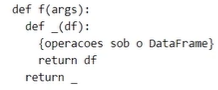

2) Depois de definida a função, ela pode ser chamada da seguinte forma:

df. transform(f(args))

In [19]:
#Para versões do Spark anterior a 3.0 é necessário definir o método .transform da seguinte forma
from pyspark.sql import DataFrame

def transform(self, f):
  return f(self)

DataFrame.transform = transform

In [20]:
def renamer(dict):
  def _(df):
    for c, n in dict.items():
      df = df.withColumnRenamed(c, n)
    return df
  return _

In [21]:
df.limit(5).toPandas()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,None,567595.43,567595.43,2011,None,San Francisco,None
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,None,538909.28,538909.28,2011,None,San Francisco,None
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,None,335279.91,335279.91,2011,None,San Francisco,None
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,None,332343.61,332343.61,2011,None,San Francisco,None
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,None,326373.19,326373.19,2011,None,San Francisco,None


In [15]:
df.columns

['Id',
 'EmployeeName',
 'JobTitle',
 'BasePay',
 'OvertimePay',
 'OtherPay',
 'Benefits',
 'TotalPay',
 'TotalPayBenefits',
 'Year',
 'Notes',
 'Agency',
 'Status']

In [22]:
rename_dict = {
    "EmployeeName": 'Emp_Name',
    "JobTitle": 'Job',
    "BasePay": 'Salary',
}


(
    df
    .transform(renamer(rename_dict))
    .limit(5)
    .toPandas()
)

,Id,Emp_Name,Job,Salary,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,None,567595.43,567595.43,2011,None,San Francisco,None
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,None,538909.28,538909.28,2011,None,San Francisco,None
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,None,335279.91,335279.91,2011,None,San Francisco,None
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,None,332343.61,332343.61,2011,None,San Francisco,None
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,None,326373.19,326373.19,2011,None,San Francisco,None
